<a href="https://colab.research.google.com/github/hewansirak/iCog-Trainings/blob/main/IntroToPennyLane_June_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Quantum Computing with PennyLane

How to get started with ***using*** PennyLane: learning to walk before you run (to [PennyLane.ai](https://pennylane.ai/))

*   Install & import PennyLane
*   Task: create a Bell state using a circuit on a qnode (see image below), create a quantum device and return the probabilities of the states
*   Run the circuit
*   Play around with backends


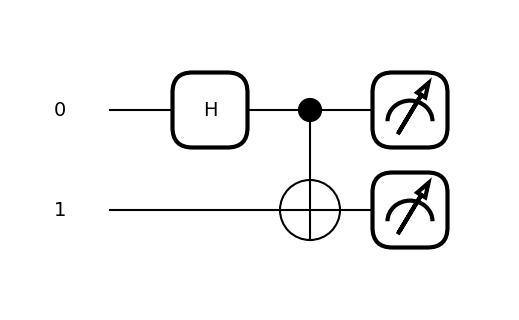

In [1]:
!pip install pennylane #Installing PennyLane #Check out: https://pennylane.ai/install for more options

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 34.4 MB/s eta 0:00:00


In [ ]:
import pennylane as qml #Using Python and importing PennyLane

/usr/local/lib/python3.11/dist-packages/pennylane/capture/capture_operators.py:33: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.4.28. You have version 0.5.2 installed. Please downgrade JAX to <=0.4.28 to avoid runtime errors.
  warnings.warn(


In [ ]:
qml.about() #Check installation and import

Name: PennyLane
Version: 0.41.1
Summary: PennyLane is a cross-platform Python library for quantum computing, quantum machine learning, and quantum chemistry. Train a quantum computer the same way as a neural network.
Home-page: https://github.com/PennyLaneAI/pennylane
Author: 
Author-email: 
License: Apache License 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: appdirs, autograd, autoray, cachetools, diastatic-malt, networkx, numpy, packaging, pennylane-lightning, requests, rustworkx, scipy, tomlkit, typing-extensions
Required-by: PennyLane_Lightning

Platform info:           Linux-6.1.123+-x86_64-with-glibc2.35
Python version:          3.11.13
Numpy version:           2.0.2
Scipy version:           1.15.3
Installed devices:
- lightning.qubit (PennyLane_Lightning-0.41.1)
- default.clifford (PennyLane-0.41.1)
- default.gaussian (PennyLane-0.41.1)
- default.mixed (PennyLane-0.41.1)
- default.qubit (PennyLane-0.41.1)
- default.qutrit (PennyLane-0.41.1)
- default.qutrit.mi

In [ ]:
#Checklist: installed, imported, checked installation/import
#Define a backend
dev = qml.device('default.qubit',wires=2) #Creates a device using default.qubit as a backend with 2 wires (qubits)

In [ ]:
#Define a qnode with a circuit that creates the Bell state
@qml.qnode(dev) #This tells the circuit which device to run on (this line must be placed right above the circuit)
def circuit(): #Creating a Bell state with the circuit
  qml.Hadamard(wires=[0])
  qml.CNOT(wires=[0,1])
  return qml.probs()


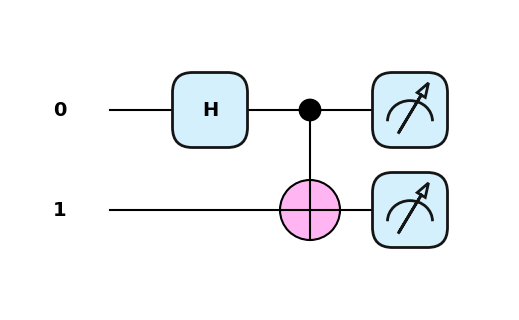

In [ ]:
qml.draw_mpl(circuit,style='pennylane')(); #Drawing the circuit above to check our programmed instructions - do the number of qubits and gate operations match as expected?
#Note the empty parenthesis indicates that the circuit takes no parameters.
#In case the circuit takes parameters they can be added within these parenthesis
#The semicolon at the end just suppresses plotting information (optional)

In [ ]:
#%%timeit #This is a timing decorator for the execution of this circuit. You can compare this if you want to explore other backends or more advanced features like quantum compilation, e.g. https://pennylane.ai/compilation
circuit() #Executing the circuit, which returns us the probability of the Bell state
#50% probability of observing state 00, 0% of 01, 10, 50% 11

array([0.512, 0.   , 0.   , 0.488])

In [ ]:
dev = qml.device('lightning.qubit',wires=2) #We're only changing the backend from default.qubit previously, to lightning.qubit now. All else is the same.
@qml.qnode(dev)
def circuit(): #Creating a Bell state with the circuit
  qml.Hadamard(wires=[0])
  qml.CNOT(wires=[0,1])
  return qml.probs()

In [ ]:
#%%timeit
circuit() #Notice that this gives the same result regardless of backend (unless we specify shots)

array([0.5, 0. , 0. , 0.5])

In [ ]:
dev = qml.device('lightning.qubit',wires=2, shots=1000) #Now, we're introducing "shots", which gives us numerical results (like an experiment) versus analytical ones (like pen & paper)
@qml.qnode(dev)
def circuit(): #Creating a Bell state with the circuit
  qml.Hadamard(wires=[0])
  qml.CNOT(wires=[0,1])
  return qml.probs()

In [ ]:
circuit() #Note the probabilities change every call (random number seed-dependent), as well as to the number of shots used (to converge upon probabilities)

array([0.489, 0.   , 0.   , 0.511])

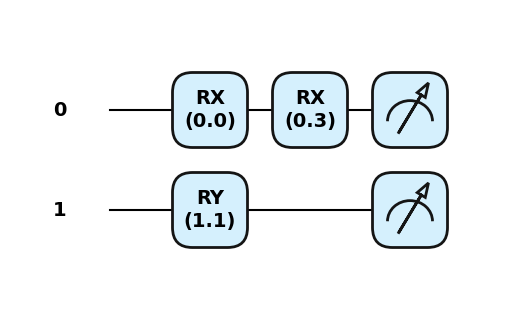

In [ ]:
#A more complicated example, prepared to show you how to use a subroutine, or sub-circuit to make programming more efficient
#Templates are similar, but the subroutines are already written for you (https://docs.pennylane.ai/en/stable/introduction/templates.html)

#The sub-circuit (not yet tied to a qnode)
def subcircuit(x):
  qml.RX(x,wires=0)

@qml.qnode(dev)
def circuit(params):
  for i in range(2):
    subcircuit(i*params[0]) #Using the sub-circuit
  qml.RY(params[1], wires=1) #Taking in parameters from the circuit
  return qml.probs()

qml.draw_mpl(circuit, decimals=1, style='pennylane')([0.3, 1.1]);

In [ ]:
circuit([0.3,1.1])

array([0.692, 0.278, 0.024, 0.006])